#### <center> PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS </center>

#### <center> NÚCLEO DE EDUCAÇÃO A DISTÂNCIA </center>

#### <center> Pós-graduação Lato Sensu em Ciência de Dados e Big Data </center>

# <center> Modelos de classificação da gravidade de acidentes em rodovias federais brasileiras através de algoritmos de redes neurais </center>

#### <center> Ramon Batista de Araújo </center>

#### <center> Belo Horizonte, 2021 </center>

### Resumo

Os acidentes de trânsito são um problema sério de saúde pública no planeta (MÁSILKOVÁ, 2017). Segundo dados da PRF (Polícia Rodoviária Federa), em 2016 acoteceram por volta de 96 mil acidentes, com 87 mil pessoas feridas e 6.398 óbitos, somente em rodovias federais brasileiras. Além disso, esses acidentes geraram mais de 12,3 bilhões de reais em custos para os cofres brasileiros. (BRASIL, 2018). De acorodo com o último relatório de década da OMS (Organização Mundial de Saúde) acidentes de trânsito é a 8ª principal causa de mortes no mundo e a principal entre pessoas de 5 a 29 anos. São 1,35 milhões de vidas perdidas por ano em acidentes de trânsito (WORLD HEALTH ORGANIZATION, 2018).

Técnicas como machine learning podem extrair conhecimento, auxiliando-os pesquisadores e gestores da área em tomadas de decisões. Os algoritmos de aprendizado de máquina de redes neurais são capazes de classificar a gravidade de um acidente de trânsito, como usado por diversos profissionais em todo mundo. Assim sendo, este estudo tem como objetivo classificar a gravidade dos acidentes de trânsito em rodovias federais brasileiras utilizando de redes neurais. Além disso, complementar os trabalhos já realizados descritos no relatório desse projeto, incluindo na análise novos atributos como a marca, idade e a potência do motor do veículo. 

Esse estudo comparou quatro modelos de redes neurais, modelo com dados desbalanceados, com dados balanceados, modelo otimizado desbalanceado e modelo otimizado balanceado, conforme procedimento abaixo.

## Importação das bibliotecas

In [1]:
#Instalação das bibliotecas (se necessário)
# !pip install pandas
# !pip install numpy
# !pip install holidays
# !pip install imblearn
# !pip install seaborn
# !pip install matplotlib
# !pip install sklearn

In [2]:
#Importação das bibliotecas e módulos

#Tratamentos dos dados
import pandas as pd
import numpy as np

#Balancemaneto
from imblearn.under_sampling import NearMiss

#Datas
from datetime import datetime

#Feriados
from pandas.tseries import holiday
import holidays

#Gráficos
import seaborn as sns
import matplotlib as mpl  
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#Seleção de Variáveis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler


#Modelo de Redes Neurais
from sklearn.neural_network import MLPClassifier

#Avaliação do Modelo
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#Otimizando Modelo
from sklearn.model_selection import GridSearchCV


## Importando os datasets

### Dados de acidentes da Polícia Rodoviária Federal 

In [3]:
#Acidentes de 2017
df17 = pd.read_csv('acidentes2017.csv', sep=';')

df17.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8,1.0,01/01/2017,domingo,00:00:00,PR,376.0,112,PARANAVAI,Sim,...,Masculino,0,0,1,0,"-23,09880731","-52,38789369",SR-PR,DEL7/7,UOP05/PR
1,9,955.0,01/01/2017,domingo,00:01:00,SC,101.0,234,PALHOCA,Sim,...,Masculino,1,0,0,0,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC
2,11,2.0,01/01/2017,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,Feminino,0,1,0,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR
3,11,3.0,01/01/2017,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,Masculino,0,1,0,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR
4,12,1499.0,01/01/2017,domingo,00:00:00,GO,153.0,435,ANAPOLIS,Sim,...,Masculino,0,0,1,0,"-16,27473677","-48,96908998",SR-GO,DEL1/2,UOP01/GO


In [4]:
#Acidentes de 2018
df18 = pd.read_csv('acidentes2018.csv', sep=';')

df18.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,99973,216523.0,01/01/2018,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Sim,...,Masculino,0,0,1,0,"-22,46937","-44,44705",SR-RJ,DEL5/7,UOP03/RJ
1,99973,216524.0,01/01/2018,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Sim,...,Feminino,0,0,1,0,"-22,46937","-44,44705",SR-RJ,DEL5/7,UOP03/RJ
2,99973,216532.0,01/01/2018,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Sim,...,Masculino,1,0,0,0,"-22,46937","-44,44705",SR-RJ,DEL5/7,UOP03/RJ
3,99973,216527.0,01/01/2018,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Sim,...,Feminino,0,0,1,0,"-22,46937","-44,44705",SR-RJ,DEL5/7,UOP03/RJ
4,99973,216530.0,01/01/2018,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Sim,...,Masculino,0,0,1,0,"-22,46937","-44,44705",SR-RJ,DEL5/7,UOP03/RJ


In [5]:
#Acidentes de 2019
df19 = pd.read_csv('acidentes2019.csv', sep=';')

df19.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210,402103.0,01/01/2019,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210,402106.0,01/01/2019,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210,402104.0,01/01/2019,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210,402102.0,01/01/2019,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211,402126.0,01/01/2019,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,...,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR


In [6]:
#Acidentes de 2020
df20 = pd.read_csv('acidentes2020.csv', sep=';')

df20.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260031,578986.0,01/01/2020,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260031,578986.0,01/01/2020,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
2,260031,578991.0,01/01/2020,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
3,260031,578991.0,01/01/2020,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
4,260031,578987.0,01/01/2020,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN


### Dados das características do veículo pelo Renavam 

In [7]:
#Características dos Veículos
dfpot = pd.read_csv('potencia.csv', sep='"",""', encoding='utf-8')

dfpot.head()

<ipython-input-7-28f64578d2d8>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfpot = pd.read_csv('potencia.csv', sep='"",""', encoding='utf-8')


,"Tipo Veículo,""Código Marca Modelo Veículo",Marca Modelo,Ano Fabricação Veículo,Combustível Veiculo,Potência Veículo – Frota Atual,Eixos Veículo – Frota Atual,Cilindradas Veículo – Frota Atual,"Qtd. Veículos Frota Atual"""""""
0,"""AUTOMOVEL,""""200605",I/FORD F SERIES F68,2009,ALCOOL/GASOLINA,75,0,1000,"1"""""""
1,"""AUTOMOVEL,""""114358",A.GUGELMIN/F.PROPRIA BUG,2008,GASOLINA,85,0,0,"1"""""""
2,"""AUTOMOVEL,""""114396",A.SALVADOR/F.PROPRIA AUT,2014,GASOLINA,86,0,0,"1"""""""
3,"""AUTOMOVEL,""""132599",ADAMO,1962,GASOLINA,46,0,0,"1"""""""
4,"""AUTOMOVEL,""""132599",ADAMO,1972,GASOLINA,65,0,4,"1"""""""


## Processamento dos dados de acidentes 

### Informações Acidentes 2017

In [8]:
#Informações do dataset Acidentes 2017
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349067 entries, 0 to 349066
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      349067 non-null  int64  
 1   pesid                   319292 non-null  float64
 2   data_inversa            349067 non-null  object 
 3   dia_semana              349067 non-null  object 
 4   horario                 349067 non-null  object 
 5   uf                      349067 non-null  object 
 6   br                      348546 non-null  float64
 7   km                      348546 non-null  object 
 8   municipio               349067 non-null  object 
 9   causa_principal         349067 non-null  object 
 10  causa_acidente          349067 non-null  object 
 11  ordem_tipo_acidente     349067 non-null  int64  
 12  tipo_acidente           349067 non-null  object 
 13  classificacao_acidente  349067 non-null  object 
 14  fase_dia            

In [9]:
#Conferência de valores únicos dos Acidentes 2017
df17.nunique()

id                         89557
pesid                     204377
data_inversa                 365
dia_semana                     7
horario                     1358
uf                            27
br                           115
km                          8531
municipio                   1835
causa_principal                2
causa_acidente                23
ordem_tipo_acidente            9
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                164608
tipo_veiculo                  25
marca                       6562
ano_fabricacao_veiculo        66
tipo_envolvido                 6
estado_fisico                  5
idade                        143
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_gr

### Informações Acidentes 2018

In [10]:
#Informações do dataset Acidentes 2018
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324809 entries, 0 to 324808
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      324809 non-null  object 
 1   pesid                   299277 non-null  float64
 2   data_inversa            324809 non-null  object 
 3   dia_semana              324809 non-null  object 
 4   horario                 324809 non-null  object 
 5   uf                      324809 non-null  object 
 6   br                      324257 non-null  float64
 7   km                      324257 non-null  object 
 8   municipio               324809 non-null  object 
 9   causa_principal         324809 non-null  object 
 10  causa_acidente          324809 non-null  object 
 11  ordem_tipo_acidente     324754 non-null  float64
 12  tipo_acidente           324754 non-null  object 
 13  classificacao_acidente  324809 non-null  object 
 14  fase_dia            

In [11]:
#Conferência de valores únicos dos Acidentes 2018
df18.nunique()

id                         69319
pesid                     164853
data_inversa                 365
dia_semana                     7
horario                     1292
uf                            27
br                           113
km                          8047
municipio                   1782
causa_principal                2
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica         9
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                129475
tipo_veiculo                  25
marca                       6331
ano_fabricacao_veiculo        64
tipo_envolvido                 6
estado_fisico                  5
idade                        127
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_gr

### Informações Acidentes 2019

In [12]:
#Informações do dataset Acidentes 2019
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331666 entries, 0 to 331665
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      331666 non-null  object 
 1   pesid                   307223 non-null  float64
 2   data_inversa            331666 non-null  object 
 3   dia_semana              331666 non-null  object 
 4   horario                 331666 non-null  object 
 5   uf                      331666 non-null  object 
 6   br                      331291 non-null  float64
 7   km                      331291 non-null  object 
 8   municipio               331666 non-null  object 
 9   causa_principal         331666 non-null  object 
 10  causa_acidente          331666 non-null  object 
 11  ordem_tipo_acidente     331626 non-null  float64
 12  tipo_acidente           331626 non-null  object 
 13  classificacao_acidente  331666 non-null  object 
 14  fase_dia            

In [13]:
#Conferência de valores únicos dos Acidentes 2019
df19.nunique()

id                         67464
pesid                     162299
data_inversa                 365
dia_semana                     7
horario                     1304
uf                            27
br                           115
km                          7918
municipio                   1767
causa_principal                2
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                125660
tipo_veiculo                  24
marca                       6308
ano_fabricacao_veiculo        64
tipo_envolvido                 6
estado_fisico                  5
idade                        122
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_gr

### Informações Acidentes 2020

In [14]:
#Informações do dataset Acidentes 2020
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93731 entries, 0 to 93730
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      93731 non-null  int64  
 1   pesid                   86314 non-null  float64
 2   data_inversa            93731 non-null  object 
 3   dia_semana              93731 non-null  object 
 4   horario                 93731 non-null  object 
 5   uf                      93731 non-null  object 
 6   br                      93550 non-null  float64
 7   km                      93550 non-null  object 
 8   municipio               93731 non-null  object 
 9   causa_principal         93731 non-null  object 
 10  causa_acidente          93731 non-null  object 
 11  ordem_tipo_acidente     93731 non-null  int64  
 12  tipo_acidente           93731 non-null  object 
 13  classificacao_acidente  93731 non-null  object 
 14  fase_dia                93731 non-null

In [15]:
#Conferência de valores únicos dos Acidentes 2020
df20.nunique()

id                        15709
pesid                     37936
data_inversa                 91
dia_semana                    7
horario                     791
uf                           27
br                          109
km                         4972
municipio                  1483
causa_principal               2
causa_acidente               24
ordem_tipo_acidente           8
tipo_acidente                16
classificacao_acidente        3
fase_dia                      4
sentido_via                   3
condicao_metereologica        8
tipo_pista                    3
tracado_via                  10
uso_solo                      2
id_veiculo                28944
tipo_veiculo                 22
marca                      3815
ano_fabricacao_veiculo       60
tipo_envolvido                6
estado_fisico                 5
idade                       111
sexo                          4
ilesos                        2
feridos_leves                 2
feridos_graves                2
mortos  

### Concatenção e tratamentos dos datasets de acidentes

In [16]:
#Concatenando datasets de Acidentes
df = pd.concat([df17, df18, df19, df20])

df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8,1.0,01/01/2017,domingo,00:00:00,PR,376.0,112,PARANAVAI,Sim,...,Masculino,0,0,1,0,"-23,09880731","-52,38789369",SR-PR,DEL7/7,UOP05/PR
1,9,955.0,01/01/2017,domingo,00:01:00,SC,101.0,234,PALHOCA,Sim,...,Masculino,1,0,0,0,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC
2,11,2.0,01/01/2017,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,Feminino,0,1,0,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR
3,11,3.0,01/01/2017,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,Masculino,0,1,0,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR
4,12,1499.0,01/01/2017,domingo,00:00:00,GO,153.0,435,ANAPOLIS,Sim,...,Masculino,0,0,1,0,"-16,27473677","-48,96908998",SR-GO,DEL1/2,UOP01/GO


In [17]:
#Informações do dataset de acidentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099273 entries, 0 to 93730
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1099273 non-null  object 
 1   pesid                   1012106 non-null  float64
 2   data_inversa            1099273 non-null  object 
 3   dia_semana              1099273 non-null  object 
 4   horario                 1099273 non-null  object 
 5   uf                      1099273 non-null  object 
 6   br                      1097644 non-null  float64
 7   km                      1097644 non-null  object 
 8   municipio               1099273 non-null  object 
 9   causa_principal         1099273 non-null  object 
 10  causa_acidente          1099273 non-null  object 
 11  ordem_tipo_acidente     1099178 non-null  float64
 12  tipo_acidente           1099178 non-null  object 
 13  classificacao_acidente  1099273 non-null  object 
 14  fase

In [18]:
#Remoção de valores ausentes 
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830291 entries, 0 to 93730
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      830291 non-null  object 
 1   pesid                   830291 non-null  float64
 2   data_inversa            830291 non-null  object 
 3   dia_semana              830291 non-null  object 
 4   horario                 830291 non-null  object 
 5   uf                      830291 non-null  object 
 6   br                      830291 non-null  float64
 7   km                      830291 non-null  object 
 8   municipio               830291 non-null  object 
 9   causa_principal         830291 non-null  object 
 10  causa_acidente          830291 non-null  object 
 11  ordem_tipo_acidente     830291 non-null  float64
 12  tipo_acidente           830291 non-null  object 
 13  classificacao_acidente  830291 non-null  object 
 14  fase_dia             

In [19]:
#Remoção de valores duplicados
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830290 entries, 0 to 93730
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      830290 non-null  object 
 1   pesid                   830290 non-null  float64
 2   data_inversa            830290 non-null  object 
 3   dia_semana              830290 non-null  object 
 4   horario                 830290 non-null  object 
 5   uf                      830290 non-null  object 
 6   br                      830290 non-null  float64
 7   km                      830290 non-null  object 
 8   municipio               830290 non-null  object 
 9   causa_principal         830290 non-null  object 
 10  causa_acidente          830290 non-null  object 
 11  ordem_tipo_acidente     830290 non-null  float64
 12  tipo_acidente           830290 non-null  object 
 13  classificacao_acidente  830290 non-null  object 
 14  fase_dia             

In [20]:
#Conferência de valores únicos dos Acidentes 2020
df.nunique()


id                        218640
pesid                     478434
data_inversa                1186
dia_semana                     7
horario                     1430
uf                            27
br                           124
km                          9341
municipio                   1921
causa_principal                2
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    2
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                343152
tipo_veiculo                  21
marca                       7721
ano_fabricacao_veiculo        68
tipo_envolvido                 4
estado_fisico                  4
idade                        181
sexo                           3
ilesos                         2
feridos_leves                  2
feridos_gr

In [21]:
#Backup DatraFrame
df2 = df

### Explorando os atributos 

In [22]:
#Verificando varívael id
df2['id'].value_counts()

48048     1204
142787     726
120498     720
158551     616
31281      444
          ... 
61417        1
135600       1
61415        1
61414        1
8            1
Name: id, Length: 218640, dtype: int64

In [23]:
#Verificando varívael pesid
df2['pesid'].value_counts()

312034.0    242
312038.0    242
359244.0     84
359241.0     84
359242.0     84
           ... 
81883.0       1
20471.0       1
81885.0       1
265748.0      1
2.0           1
Name: pesid, Length: 478434, dtype: int64

In [24]:
#Verificando varívael data
df2['data_inversa'].value_counts()

23/12/2017    1983
24/03/2018    1910
22/06/2017    1906
08/03/2020    1575
22/02/2020    1444
              ... 
28/05/2018     303
25/05/2018     296
26/05/2018     265
29/05/2018     214
26/03/2020     206
Name: data_inversa, Length: 1186, dtype: int64

In [25]:
#Verificando varívael horário
df2['horario'].value_counts()

18:30:00    11733
18:00:00    11541
19:00:00    11320
17:00:00    10259
16:00:00     9110
            ...  
02:01:00        1
00:41:00        1
03:02:00        1
02:57:00        1
02:36:00        1
Name: horario, Length: 1430, dtype: int64

In [26]:
#Verificando varívael UF
df2['uf'].value_counts()

MG    125844
PR    103017
SC     95676
RS     67128
SP     56716
RJ     48445
BA     45679
GO     35614
MT     30502
PE     29393
ES     27297
MS     23838
CE     21600
PB     21514
RO     21302
MA     16647
PI     15084
RN     14163
PA     13735
AL      7419
SE      7355
DF      1086
TO       371
AM       342
AC       226
RR       199
AP        98
Name: uf, dtype: int64

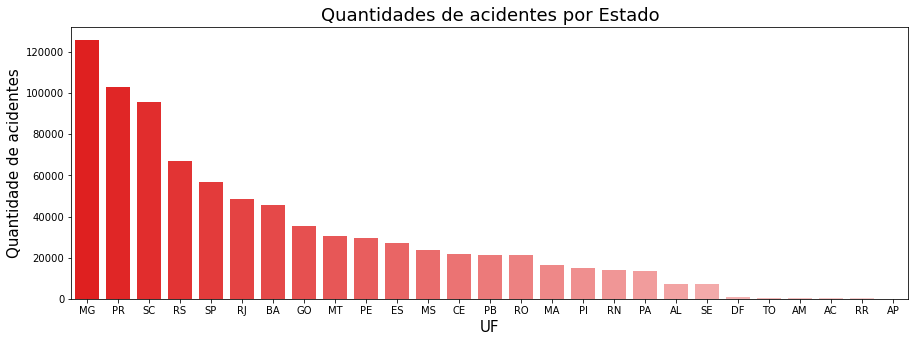

In [27]:
#Gráfico por Estado
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,5)) #Tamanho
sns.countplot(x='uf', #variável
              order=df2['uf'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel('UF',fontsize=15)
plt.ylabel('Quantidade de acidentes',fontsize=15)
plt.title('Quantidades de acidentes por Estado',fontsize=18)
plt.savefig('quant_acid_uf.svg', format='svg')


In [28]:
#Verificando varívael BR
df2['br'].value_counts()

101.0    125179
116.0    117080
381.0     49232
40.0      35073
153.0     32875
          ...  
477.0         2
383.0         2
473.0         2
498.0         1
401.0         1
Name: br, Length: 124, dtype: int64

In [29]:
#Convertendo em inteiro
df2['br'] = df2['br'].astype(int)

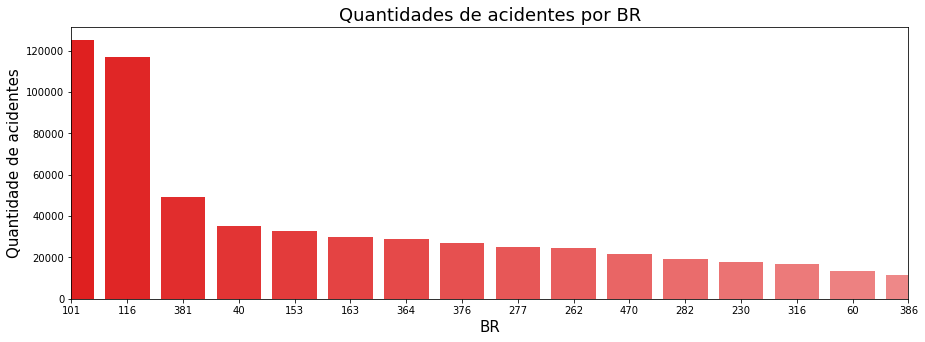

In [30]:
#Gráfico por BR
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,5)) #Tamanho
sns.countplot(x='br', #variável
              order=df2['br'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel('BR',fontsize=15)
plt.ylabel('Quantidade de acidentes',fontsize=15)
plt.title('Quantidades de acidentes por BR',fontsize=18)
plt.xlim(0,15)
plt.savefig('quant_acid_br.svg', format='svg')


In [31]:
#Verificando varívael Km
df2['km'].value_counts()

1        2382
3        2199
4        2003
2        1890
5        1781
         ... 
395,7       1
918,8       1
894,5       1
917,2       1
833,4       1
Name: km, Length: 9341, dtype: int64

In [32]:
#Verificando varívael Cidade
df2['municipio'].value_counts()

CURITIBA                        11331
SAO JOSE                         9412
GUARULHOS                        9172
BETIM                            6996
PALHOCA                          6538
                                ...  
COXILHA                             1
MANGUEIRINHA                        1
SENADOR ALEXANDRE COSTA             1
MANICORE                            1
SAO LUIS GONZAGA DO MARANHAO        1
Name: municipio, Length: 1921, dtype: int64

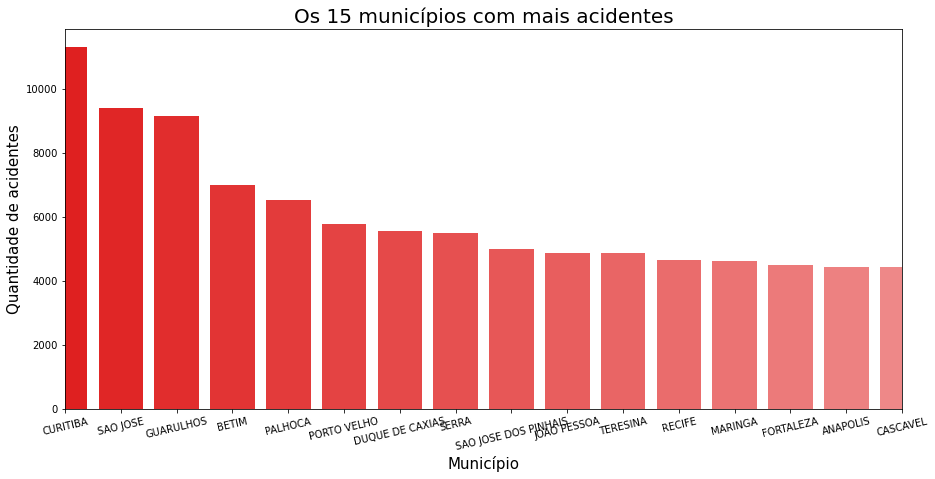

In [33]:
#Gráfico por Município
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,7)) #Tamanho
sns.countplot(x='municipio', #variável
              order=df2['municipio'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel('Município',fontsize=15)
plt.ylabel('Quantidade de acidentes',fontsize=15)
plt.title('Os 15 municípios com mais acidentes',fontsize=20)
plt.xticks(fontsize=10,rotation=13)
plt.xlim(0,15)
plt.savefig('quant_acid_municipio.svg', format='svg')


In [34]:
#Verificando varívael Causa Principal
df2['causa_principal'].value_counts()

Sim    663184
Não    167106
Name: causa_principal, dtype: int64

In [35]:
#Selecionando somente causas principais
df2 = df2.loc[df2['causa_principal'] == 'Sim']

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663184 entries, 0 to 93730
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      663184 non-null  object 
 1   pesid                   663184 non-null  float64
 2   data_inversa            663184 non-null  object 
 3   dia_semana              663184 non-null  object 
 4   horario                 663184 non-null  object 
 5   uf                      663184 non-null  object 
 6   br                      663184 non-null  int32  
 7   km                      663184 non-null  object 
 8   municipio               663184 non-null  object 
 9   causa_principal         663184 non-null  object 
 10  causa_acidente          663184 non-null  object 
 11  ordem_tipo_acidente     663184 non-null  float64
 12  tipo_acidente           663184 non-null  object 
 13  classificacao_acidente  663184 non-null  object 
 14  fase_dia             

In [36]:
#Valores únicos
df2.nunique()

id                        218640
pesid                     478434
data_inversa                1186
dia_semana                     7
horario                     1430
uf                            27
br                           124
km                          9341
municipio                   1921
causa_principal                1
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    2
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                343152
tipo_veiculo                  21
marca                       7721
ano_fabricacao_veiculo        68
tipo_envolvido                 4
estado_fisico                  4
idade                        181
sexo                           3
ilesos                         2
feridos_leves                  2
feridos_gr

In [37]:
#Verificando varívael Causa do Acidente
df2['causa_acidente'].value_counts()

Falta de Atenção à Condução                                                       239349
Velocidade Incompatível                                                            74414
Desobediência às normas de trânsito pelo condutor                                  70256
Não guardar distância de segurança                                                 50489
Ingestão de Álcool                                                                 46996
Defeito Mecânico no Veículo                                                        31091
Condutor Dormindo                                                                  28314
Pista Escorregadia                                                                 25212
Ultrapassagem Indevida                                                             19901
Animais na Pista                                                                   14070
Falta de Atenção do Pedestre                                                       12853
Avarias e/ou desgaste

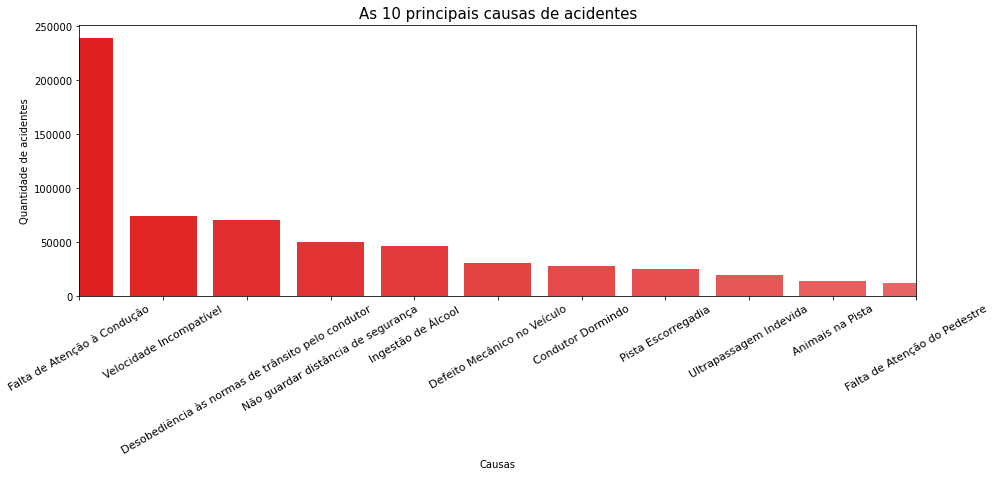

In [38]:
#Gráfico das Causas de Acidentes
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,5)) #Tamanho
sns.countplot(x='causa_acidente', #variável
              order=df2['causa_acidente'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel("Causas",fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('As 10 principais causas de acidentes',fontsize=15)
plt.xticks(fontsize=11,rotation=30)
plt.xlim(0,10)
plt.savefig('causa.svg', format='svg')


In [39]:
#Verificando varívael Ordem do Acidente
df2['ordem_tipo_acidente'].value_counts()

1.0     480122
2.0     132793
3.0      37834
4.0       8316
5.0       2549
6.0        900
7.0        335
8.0        153
9.0         70
10.0        61
11.0        51
Name: ordem_tipo_acidente, dtype: int64

In [40]:
#Verificando varívael Tipo de acidente
df2['tipo_acidente'].value_counts()

Colisão traseira                   121642
Saída de leito carroçável           90008
Colisão lateral                     74672
Colisão transversal                 71736
Colisão com objeto estático         54990
Tombamento                          54172
Colisão frontal                     51486
Capotamento                         49613
Queda de ocupante de veículo        35597
Atropelamento de Pedestre           19534
Engavetamento                       16661
Atropelamento de Animal              7592
Incêndio                             5436
Derramamento de carga                4242
Colisão com objeto em movimento      4159
Danos eventuais                      1644
Name: tipo_acidente, dtype: int64

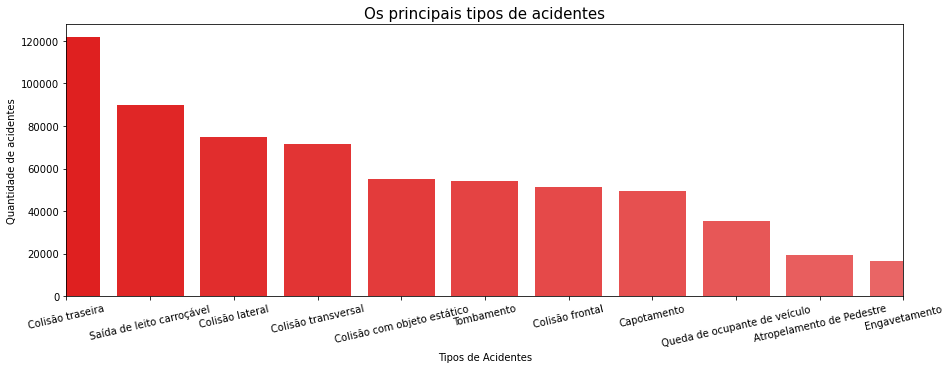

In [41]:
#Gráfico dos tipos de acidente
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,5)) #Tamanho
sns.countplot(x='tipo_acidente', #variável
              order=df2['tipo_acidente'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel("Tipos de Acidentes",fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('Os principais tipos de acidentes',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.xlim(0,10)
plt.savefig('tipo.pdf', format='pdf')


In [42]:
#Verificando varívael Classificação do acidente
df2['classificacao_acidente'].value_counts()

Com Vítimas Feridas    479564
Sem Vítimas            117568
Com Vítimas Fatais      66052
Name: classificacao_acidente, dtype: int64

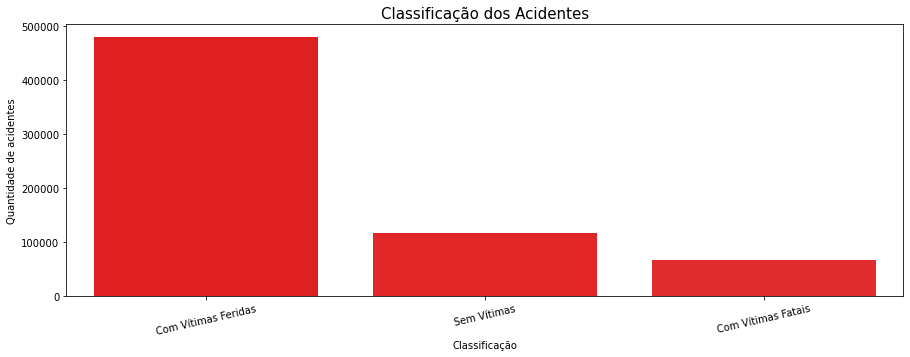

In [43]:
#Gráfico da Classificação do acidente
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,5)) #Tamanho
sns.countplot(x='classificacao_acidente', #variável
              order=df2['classificacao_acidente'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel("Classificação",fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('Classificação dos Acidentes',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('classificacao.svg', format='svg')


In [44]:
#Verificando varívael fase do dia
df2['fase_dia'].value_counts()

Pleno dia      382461
Plena Noite    211767
Anoitecer       37101
Amanhecer       31855
Name: fase_dia, dtype: int64

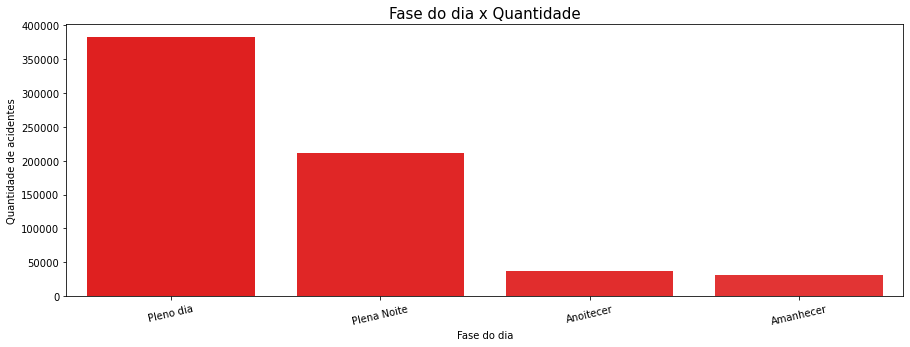

In [45]:
#Gráfico da Fase do Dia
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,5)) #Tamanho
sns.countplot(x='fase_dia', #variável
              order=df2['fase_dia'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel("Fase do dia",fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('Fase do dia x Quantidade',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('fase.svg', format='svg')


In [46]:
#Verificando varívael Sentido da Via
df2['sentido_via'].value_counts()

Crescente      355928
Decrescente    307256
Name: sentido_via, dtype: int64

In [47]:
#Verificando varívael Trçado da Via
df2['tracado_via'].value_counts()

Reta                     394707
Curva                    113986
Não Informado             78873
Interseção de vias        29547
Desvio Temporário         19247
Rotatória                 10892
Retorno Regulamentado      7072
Viaduto                    4319
Ponte                      3876
Túnel                       665
Name: tracado_via, dtype: int64

In [48]:
#Removendo valores não informados
df2 = df2.loc[df2['tracado_via'] != 'Não Informado']

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584311 entries, 0 to 93730
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      584311 non-null  object 
 1   pesid                   584311 non-null  float64
 2   data_inversa            584311 non-null  object 
 3   dia_semana              584311 non-null  object 
 4   horario                 584311 non-null  object 
 5   uf                      584311 non-null  object 
 6   br                      584311 non-null  int32  
 7   km                      584311 non-null  object 
 8   municipio               584311 non-null  object 
 9   causa_principal         584311 non-null  object 
 10  causa_acidente          584311 non-null  object 
 11  ordem_tipo_acidente     584311 non-null  float64
 12  tipo_acidente           584311 non-null  object 
 13  classificacao_acidente  584311 non-null  object 
 14  fase_dia             

In [49]:
df2.nunique()

id                        196718
pesid                     427519
data_inversa                1186
dia_semana                     7
horario                     1424
uf                            27
br                           122
km                          9226
municipio                   1909
causa_principal                1
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    2
condicao_metereologica        10
tipo_pista                     3
tracado_via                    9
uso_solo                       2
id_veiculo                307951
tipo_veiculo                  21
marca                       7503
ano_fabricacao_veiculo        67
tipo_envolvido                 4
estado_fisico                  4
idade                        178
sexo                           3
ilesos                         2
feridos_leves                  2
feridos_gr

In [50]:
#Valores traçado da via
df2['tracado_via'].value_counts()

Reta                     394707
Curva                    113986
Interseção de vias        29547
Desvio Temporário         19247
Rotatória                 10892
Retorno Regulamentado      7072
Viaduto                    4319
Ponte                      3876
Túnel                       665
Name: tracado_via, dtype: int64

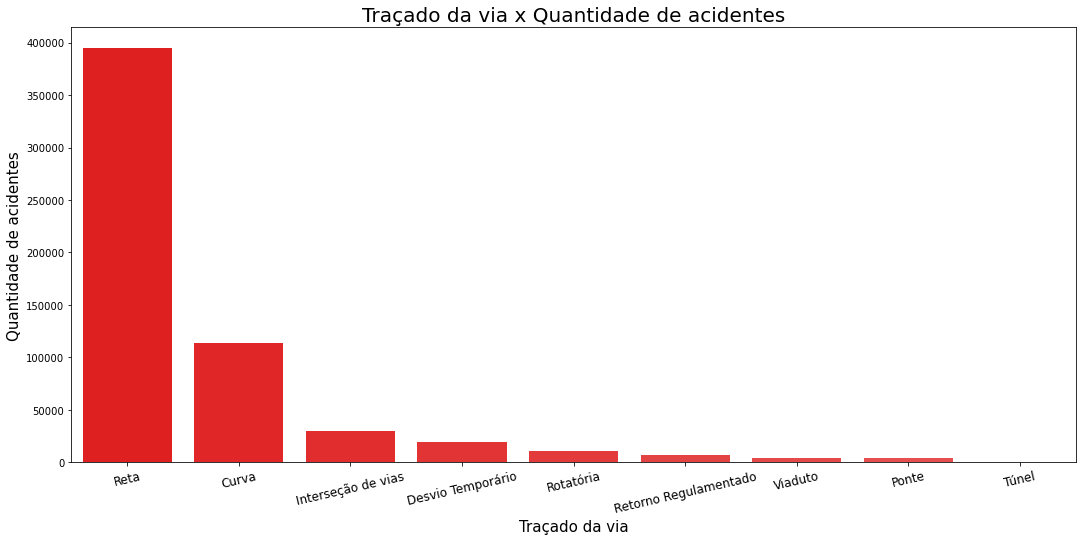

In [51]:
#Gráfico do Traçado da Via
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(18,8)) #Tamanho
sns.countplot(x='tracado_via', #variável
              order=df2['tracado_via'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel("Traçado da via",fontsize=15)
plt.ylabel('Quantidade de acidentes',fontsize=15)
plt.title('Traçado da via x Quantidade de acidentes',fontsize=20)
plt.xticks(fontsize=12,rotation=13)
plt.savefig('tracado.svg', format='svg')


In [52]:
#Verificando varívael Uso do Solo
df2['uso_solo'].value_counts()

Não    342714
Sim    241597
Name: uso_solo, dtype: int64

In [53]:
#Verificando id do veículo
df2['id_veiculo'].value_counts()

85973.0     231
86298.0     228
342242.0    204
325867.0    165
154030.0    164
           ... 
84578.0       1
338311.0      1
338308.0      1
338307.0      1
8.0           1
Name: id_veiculo, Length: 307951, dtype: int64

In [54]:
#Verificando tipo de veículo
df2['tipo_veiculo'].value_counts()

Automóvel            268794
Motocicleta          104571
Caminhonete           54436
Caminhão-trator       48738
Caminhão              41346
Ônibus                23315
Camioneta             15830
Motoneta              12187
Utilitário             6912
Micro-ônibus           5850
Semireboque            1009
Ciclomotor              986
Reboque                  96
Não Informado            84
Trator de rodas          60
Triciclo                 53
Outros                   24
Bicicleta                13
Trator misto              4
Chassi-plataforma         2
Trem-bonde                1
Name: tipo_veiculo, dtype: int64

In [55]:
#Selecionando somente automóveis
df2 = df2.loc[df2['tipo_veiculo'] == 'Automóvel']

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268794 entries, 1 to 93699
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      268794 non-null  object 
 1   pesid                   268794 non-null  float64
 2   data_inversa            268794 non-null  object 
 3   dia_semana              268794 non-null  object 
 4   horario                 268794 non-null  object 
 5   uf                      268794 non-null  object 
 6   br                      268794 non-null  int32  
 7   km                      268794 non-null  object 
 8   municipio               268794 non-null  object 
 9   causa_principal         268794 non-null  object 
 10  causa_acidente          268794 non-null  object 
 11  ordem_tipo_acidente     268794 non-null  float64
 12  tipo_acidente           268794 non-null  object 
 13  classificacao_acidente  268794 non-null  object 
 14  fase_dia             

In [56]:
#Valores unicos
df2.nunique()

id                        106789
pesid                     197526
data_inversa                1186
dia_semana                     7
horario                     1371
uf                            27
br                           114
km                          8526
municipio                   1788
causa_principal                1
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    2
condicao_metereologica         9
tipo_pista                     3
tracado_via                    9
uso_solo                       2
id_veiculo                131013
tipo_veiculo                   1
marca                       2881
ano_fabricacao_veiculo        65
tipo_envolvido                 4
estado_fisico                  4
idade                        152
sexo                           3
ilesos                         2
feridos_leves                  2
feridos_gr

In [57]:
#Conferindo
df2['tipo_veiculo'].value_counts()

Automóvel    268794
Name: tipo_veiculo, dtype: int64

In [58]:
#Verificando ano de fabricação
df2['ano_fabricacao_veiculo'].value_counts()

2013.0    21690
2012.0    20320
2014.0    19212
2011.0    19169
2010.0    18543
          ...  
1901.0        3
1947.0        2
1962.0        1
1960.0        1
1951.0        1
Name: ano_fabricacao_veiculo, Length: 65, dtype: int64

In [59]:
#Verificando tipo de envolvido
df2['tipo_envolvido'].value_counts()

Condutor      173328
Passageiro     91323
Pedestre        4084
Cavaleiro         59
Name: tipo_envolvido, dtype: int64

In [60]:
#Selecionando somente condutor
df2 = df2.loc[df2['tipo_envolvido'] == 'Condutor']

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173328 entries, 1 to 93699
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      173328 non-null  object 
 1   pesid                   173328 non-null  float64
 2   data_inversa            173328 non-null  object 
 3   dia_semana              173328 non-null  object 
 4   horario                 173328 non-null  object 
 5   uf                      173328 non-null  object 
 6   br                      173328 non-null  int32  
 7   km                      173328 non-null  object 
 8   municipio               173328 non-null  object 
 9   causa_principal         173328 non-null  object 
 10  causa_acidente          173328 non-null  object 
 11  ordem_tipo_acidente     173328 non-null  float64
 12  tipo_acidente           173328 non-null  object 
 13  classificacao_acidente  173328 non-null  object 
 14  fase_dia             

In [61]:
#Valores unicos
df2.nunique()

id                        106269
pesid                     130351
data_inversa                1186
dia_semana                     7
horario                     1368
uf                            27
br                           114
km                          8519
municipio                   1787
causa_principal                1
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    2
condicao_metereologica         9
tipo_pista                     3
tracado_via                    9
uso_solo                       2
id_veiculo                130351
tipo_veiculo                   1
marca                       2878
ano_fabricacao_veiculo        65
tipo_envolvido                 1
estado_fisico                  4
idade                        104
sexo                           3
ilesos                         2
feridos_leves                  2
feridos_gr

In [62]:
#conferindo
df2['tipo_envolvido'].value_counts()

Condutor    173328
Name: tipo_envolvido, dtype: int64

In [63]:
#Verificando Estado fisíco
df2['estado_fisico'].value_counts()

Ileso            114266
Lesões Leves      44683
Lesões Graves     10371
Óbito              4008
Name: estado_fisico, dtype: int64

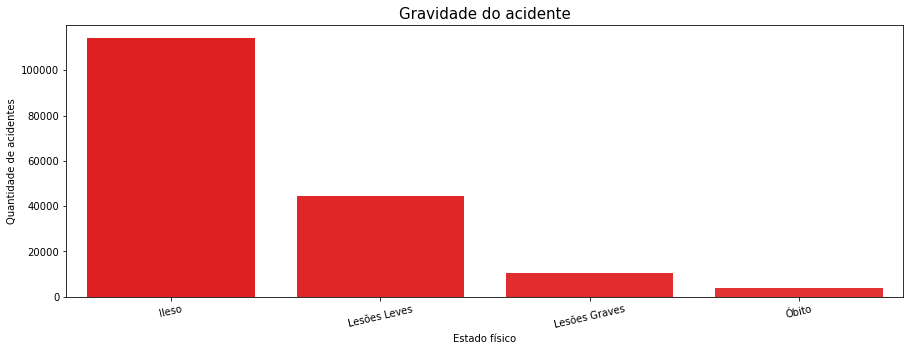

In [64]:
#Gráfico do Gravidade dos Acidentes
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,5)) #Tamanho
sns.countplot(x='estado_fisico', #variável
              order=df2['estado_fisico'].value_counts().index, #ordem descrente
              data=df2, #dataframe
              palette=cores,) #paleta de cores
plt.xlabel("Estado físico",fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('Gravidade do acidente',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('gravidade.svg', format='svg')


In [65]:
#Verificando a idade do condutor
df2['idade'].describe()

count    173328.000000
mean         40.257748
std          21.209777
min           0.000000
25%          29.000000
50%          38.000000
75%          49.000000
max        2018.000000
Name: idade, dtype: float64

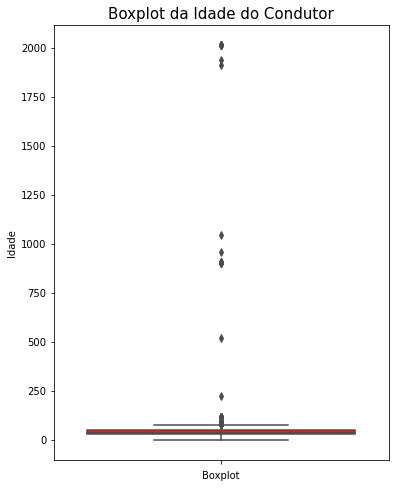

In [66]:
#Boxplot idade
idade = df2['idade']

cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(6,8)) #Tamanho
sns.boxplot(y=idade, palette=cores)
plt.xlabel("Boxplot",fontsize=10)
plt.ylabel('Idade',fontsize=10)
plt.title('Boxplot da Idade do Condutor',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('boxplot_idade.svg', format='svg')



In [67]:
#Seleção de idade acima de 18 anos e abaixo de 76 anos
df2 = df2.loc[(df2['idade'] >=18) & (df2['idade'] <=76)]

df2['idade'].describe()

count    171510.000000
mean         39.751548
std          13.087300
min          18.000000
25%          29.000000
50%          38.000000
75%          49.000000
max          76.000000
Name: idade, dtype: float64

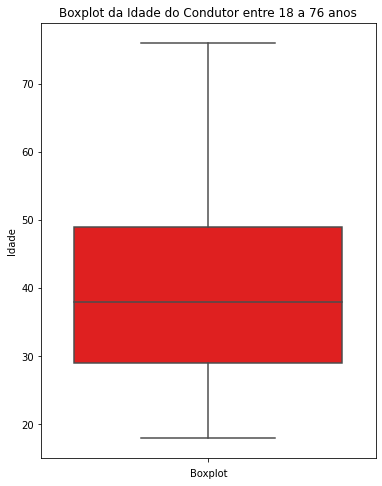

In [68]:
#Boxplot idade entre 18 a 76 anos
idade2= df2['idade']

cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(6,8)) #Tamanho
sns.boxplot(y=idade2,palette=cores)
plt.xlabel("Boxplot",fontsize=10)
plt.ylabel('Idade',fontsize=10)
plt.title('Boxplot da Idade do Condutor entre 18 a 76 anos')
plt.xticks(fontsize=10,rotation=13)
plt.savefig('boxplot_idade2.svg', format='svg')



In [69]:
#Backup de Dataset tratado
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171510 entries, 1 to 93699
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      171510 non-null  object 
 1   pesid                   171510 non-null  float64
 2   data_inversa            171510 non-null  object 
 3   dia_semana              171510 non-null  object 
 4   horario                 171510 non-null  object 
 5   uf                      171510 non-null  object 
 6   br                      171510 non-null  int32  
 7   km                      171510 non-null  object 
 8   municipio               171510 non-null  object 
 9   causa_principal         171510 non-null  object 
 10  causa_acidente          171510 non-null  object 
 11  ordem_tipo_acidente     171510 non-null  float64
 12  tipo_acidente           171510 non-null  object 
 13  classificacao_acidente  171510 non-null  object 
 14  fase_dia             

In [70]:
#Valores unicos
df2.nunique()

id                        105293
pesid                     128935
data_inversa                1186
dia_semana                     7
horario                     1367
uf                            27
br                           114
km                          8506
municipio                   1781
causa_principal                1
causa_acidente                24
ordem_tipo_acidente           11
tipo_acidente                 16
classificacao_acidente         3
fase_dia                       4
sentido_via                    2
condicao_metereologica         9
tipo_pista                     3
tracado_via                    9
uso_solo                       2
id_veiculo                128935
tipo_veiculo                   1
marca                       2866
ano_fabricacao_veiculo        65
tipo_envolvido                 1
estado_fisico                  4
idade                         59
sexo                           3
ilesos                         2
feridos_leves                  2
feridos_gr

In [71]:
#Verificando sexo do condutor
df2['sexo'].value_counts()

Masculino    140502
Feminino      30997
Ignorado         11
Name: sexo, dtype: int64

In [72]:
#Verificando nº de ilesos
df2['ilesos'].value_counts()

1    113331
0     58179
Name: ilesos, dtype: int64

In [73]:
#Verificando nº de feridos leves
df2['feridos_leves'].value_counts()

0    127488
1     44022
Name: feridos_leves, dtype: int64

In [74]:
#Verificando nº de feridos graves
df2['feridos_graves'].value_counts()

0    161272
1     10238
Name: feridos_graves, dtype: int64

In [75]:
#Verificando nº de mortos
df2['mortos'].value_counts()

0    167591
1      3919
Name: mortos, dtype: int64

In [76]:
#Backup

df3 = df2

## Análise Exploratória dos dados de acidentes

### Ano de Fabricação

In [77]:
#Estatísticas do ano de fabricação
df3['ano_fabricacao_veiculo'].describe()

count    171510.000000
mean       2008.684018
std           7.160838
min        1900.000000
25%        2005.000000
50%        2010.000000
75%        2014.000000
max        2020.000000
Name: ano_fabricacao_veiculo, dtype: float64

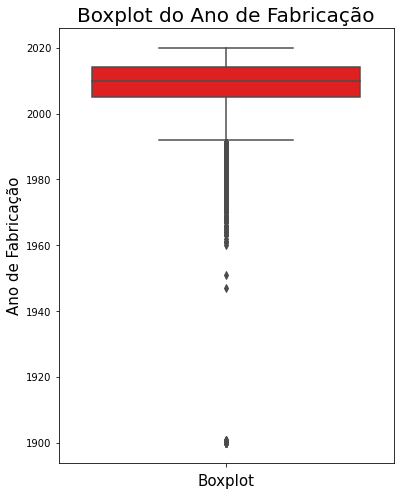

In [78]:
#Boxplot do ano de fabricação
ano = df3['ano_fabricacao_veiculo']

cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(6,8)) #Tamanho
sns.boxplot(y=ano, palette=cores)
plt.xlabel("Boxplot",fontsize=15)
plt.ylabel('Ano de Fabricação',fontsize=15)
plt.title('Boxplot do Ano de Fabricação',fontsize=20)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('boxplot_ano.svg', format='svg')


In [79]:
#Seleção de veículos fabricados após 1956
df4 = df3.loc[df3['ano_fabricacao_veiculo'] > 1956]

df4['ano_fabricacao_veiculo'].describe()

count    171490.000000
mean       2008.696105
std           7.071477
min        1960.000000
25%        2005.000000
50%        2010.000000
75%        2014.000000
max        2020.000000
Name: ano_fabricacao_veiculo, dtype: float64

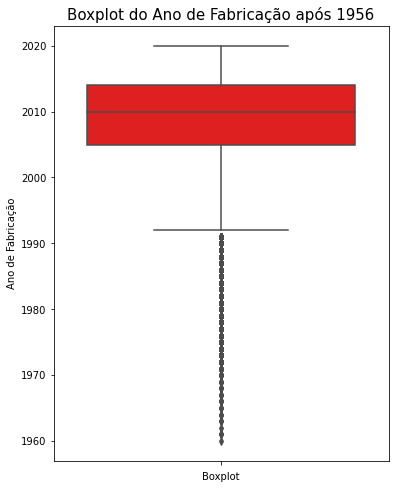

In [80]:
#Boxplot do ano de fabricação após 1956
ano = df4['ano_fabricacao_veiculo']

cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(6,8)) #Tamanho
sns.boxplot(y=ano, palette=cores)
plt.xlabel("Boxplot",fontsize=10)
plt.ylabel('Ano de Fabricação',fontsize=10)
plt.title('Boxplot do Ano de Fabricação após 1956',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('boxplot_ano2.svg', format='svg')


In [81]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171490 entries, 1 to 93699
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      171490 non-null  object 
 1   pesid                   171490 non-null  float64
 2   data_inversa            171490 non-null  object 
 3   dia_semana              171490 non-null  object 
 4   horario                 171490 non-null  object 
 5   uf                      171490 non-null  object 
 6   br                      171490 non-null  int32  
 7   km                      171490 non-null  object 
 8   municipio               171490 non-null  object 
 9   causa_principal         171490 non-null  object 
 10  causa_acidente          171490 non-null  object 
 11  ordem_tipo_acidente     171490 non-null  float64
 12  tipo_acidente           171490 non-null  object 
 13  classificacao_acidente  171490 non-null  object 
 14  fase_dia             

### Definindo a idade do veículo 

Definindo a idade do veículo pela data do acidente e ano de fabricação

#### Data do acidente

In [82]:
#Explorando a varíavel data_inversa
df4['data_inversa'].head()

1     01/01/2017
2     01/01/2017
6     01/01/2017
27    01/01/2017
28    01/01/2017
Name: data_inversa, dtype: object

In [83]:
#Convertendo em datetime pandas
df4['data_inversa'] = pd.to_datetime(df4['data_inversa'])

df4['data_inversa'].head()

<ipython-input-83-6474942b79f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['data_inversa'] = pd.to_datetime(df4['data_inversa'])


1    2017-01-01
2    2017-01-01
6    2017-01-01
27   2017-01-01
28   2017-01-01
Name: data_inversa, dtype: datetime64[ns]

In [84]:
#Criano nova coluna somente com o ano do acidente
df4['data_ano']  = df4['data_inversa']

<ipython-input-84-220b714df85c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['data_ano']  = df4['data_inversa']


In [85]:
#Selecionando apenas o ano
df4['data_ano'] = (df4['data_ano'].dt.year)

df4['data_ano'].head()

<ipython-input-85-cbf7a85e6d9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['data_ano'] = (df4['data_ano'].dt.year)


1     2017
2     2017
6     2017
27    2017
28    2017
Name: data_ano, dtype: int64

#### Ano de Fabricação

In [86]:
#Explorando a varíavel ano de fabricação
df4['ano_fabricacao_veiculo'].head()

1     2003.0
2     2013.0
6     2002.0
27    1983.0
28    1983.0
Name: ano_fabricacao_veiculo, dtype: float64

In [87]:
#Convertendo em números inteiros
df4['ano_fabricacao_veiculo'] = df4['ano_fabricacao_veiculo'].astype(int)
df4['ano_fabricacao_veiculo'].head()

<ipython-input-87-171f6ff70435>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ano_fabricacao_veiculo'] = df4['ano_fabricacao_veiculo'].astype(int)


1     2003
2     2013
6     2002
27    1983
28    1983
Name: ano_fabricacao_veiculo, dtype: int32

#### Idade do veículo

In [88]:
#Nova coluna com a idade do veículo, subtraindo ano do acidente pelo ano de fabricação
df4['idade_veiculo'] = df4['data_ano'] - df4['ano_fabricacao_veiculo'] 
df4['idade_veiculo'].head()

<ipython-input-88-3284ceebc384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['idade_veiculo'] = df4['data_ano'] - df4['ano_fabricacao_veiculo']


1     14
2      4
6     15
27    34
28    34
Name: idade_veiculo, dtype: int64

In [89]:
#Backup dataset com idade do veículo

df5 = df4

df5.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,data_ano,idade_veiculo
1,9,955.0,2017-01-01,domingo,00:01:00,SC,101,234,PALHOCA,Sim,...,0,0,0,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC,2017,14
2,11,2.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,1,0,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR,2017,4
6,14,1558.0,2017-01-01,domingo,00:40:00,GO,60,188,GUAPO,Sim,...,0,0,0,"-16,82489647","-49,53520775",SR-GO,DEL1/1,UOP02/GO,2017,15
27,17,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,0,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34
28,17,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,0,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34


### Definindo os feriados 

In [90]:
#Zerando os ids
df5= df5.reset_index()
tam = df5.shape[0]
df5['id'] = range(tam)
df5 = df5.drop(columns=['index'])
df5.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,data_ano,idade_veiculo
0,0,955.0,2017-01-01,domingo,00:01:00,SC,101,234,PALHOCA,Sim,...,0,0,0,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC,2017,14
1,1,2.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,1,0,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR,2017,4
2,2,1558.0,2017-01-01,domingo,00:40:00,GO,60,188,GUAPO,Sim,...,0,0,0,"-16,82489647","-49,53520775",SR-GO,DEL1/1,UOP02/GO,2017,15
3,3,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,0,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34
4,4,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,0,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34


In [91]:
#Conferindo a existência de feriados na data_inversa
df5['data_inversa'][0] in holidays.Brazil()

True

In [92]:
#Criando nova coluna zerada de feriados
df5['Feriado'] = 0

df5['Feriado'].value_counts()

0    171490
Name: Feriado, dtype: int64

In [93]:
#Lista de feriados no Brasil
feriado = holidays.Brazil()

#Lista com o tamanho do dataframe
tam_list = list(range(df5.shape[0]))

#Substituindo os valores zerados de feriados pela existencia de feriados na lista de feriados
for i in tam_list:
    df5['Feriado'][i] = df5['data_inversa'][i] in feriado
    
#Conferindo coluna Feriados
df5['Feriado'].head()

<ipython-input-93-02b3e61ebcfa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Feriado'][i] = df5['data_inversa'][i] in feriado
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0    True
1    True
2    True
3    True
4    True
Name: Feriado, dtype: object

In [94]:
#Quantidade de Feriados
df5['Feriado'].value_counts()

False    163957
True       7533
Name: Feriado, dtype: int64

In [95]:
####Renomeando atributos
#Feriado
df5['Feriado'] = df5['Feriado'].replace({True: 'Feriado'})

#Quando Dia Normal
df5['Feriado'] = df5['Feriado'].replace({False: 'Dia Normal'})

df5['Feriado'].value_counts()

Dia Normal    163957
Feriado         7533
Name: Feriado, dtype: int64

In [96]:
#Backup dataset com feriados
df6 = df5

df6.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,data_ano,idade_veiculo,Feriado
0,0,955.0,2017-01-01,domingo,00:01:00,SC,101,234,PALHOCA,Sim,...,0,0,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC,2017,14,Feriado
1,1,2.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,0,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR,2017,4,Feriado
2,2,1558.0,2017-01-01,domingo,00:40:00,GO,60,188,GUAPO,Sim,...,0,0,"-16,82489647","-49,53520775",SR-GO,DEL1/1,UOP02/GO,2017,15,Feriado
3,3,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado
4,4,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado


### Preparando os dados para receber o dataset de potência 

In [97]:
#Explorando os dados de ano
df6["ano_fabricacao_veiculo"].head()

0    2003
1    2013
2    2002
3    1983
4    1983
Name: ano_fabricacao_veiculo, dtype: int32

In [98]:
#Convertendo em string
df6['ano_fabricacao_veiculo'] = df6['ano_fabricacao_veiculo'].astype(str)
df6["ano_fabricacao_veiculo"].head()

0    2003
1    2013
2    2002
3    1983
4    1983
Name: ano_fabricacao_veiculo, dtype: object

In [99]:
#Criando nova coluna com as colunas marca e ano de fabricação
df6["marca_ano"] = df6["marca"] + " " + df6["ano_fabricacao_veiculo"]

df6.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,mortos,latitude,longitude,regional,delegacia,uop,data_ano,idade_veiculo,Feriado,marca_ano
0,0,955.0,2017-01-01,domingo,00:01:00,SC,101,234,PALHOCA,Sim,...,0,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC,2017,14,Feriado,FIAT/PALIO WEEKEND EX 2003
1,1,2.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,0,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR,2017,4,Feriado,VW/NOVO GOL 1.0 2013
2,2,1558.0,2017-01-01,domingo,00:40:00,GO,60,188,GUAPO,Sim,...,0,"-16,82489647","-49,53520775",SR-GO,DEL1/1,UOP02/GO,2017,15,Feriado,RENAULT/CLIO RN 1.0 16V 2002
3,3,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado,GM/CHEVETTE 1983
4,4,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,0,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado,GM/CHEVETTE 1983


## Processamento do dataset das características dos veículos

In [100]:
#Explorando o dataset
dfpot.head()

,"Tipo Veículo,""Código Marca Modelo Veículo",Marca Modelo,Ano Fabricação Veículo,Combustível Veiculo,Potência Veículo – Frota Atual,Eixos Veículo – Frota Atual,Cilindradas Veículo – Frota Atual,"Qtd. Veículos Frota Atual"""""""
0,"""AUTOMOVEL,""""200605",I/FORD F SERIES F68,2009,ALCOOL/GASOLINA,75,0,1000,"1"""""""
1,"""AUTOMOVEL,""""114358",A.GUGELMIN/F.PROPRIA BUG,2008,GASOLINA,85,0,0,"1"""""""
2,"""AUTOMOVEL,""""114396",A.SALVADOR/F.PROPRIA AUT,2014,GASOLINA,86,0,0,"1"""""""
3,"""AUTOMOVEL,""""132599",ADAMO,1962,GASOLINA,46,0,0,"1"""""""
4,"""AUTOMOVEL,""""132599",ADAMO,1972,GASOLINA,65,0,4,"1"""""""


In [101]:
#Explorando o dataset
dfpot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482312 entries, 0 to 482311
Data columns (total 8 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Tipo Veículo,"Código Marca Modelo Veículo  482312 non-null  object
 1   Marca Modelo                               482312 non-null  object
 2   Ano Fabricação Veículo                     482312 non-null  int64 
 3   Combustível Veiculo                        482312 non-null  object
 4   Potência Veículo – Frota Atual             482312 non-null  int64 
 5   Eixos Veículo – Frota Atual                482312 non-null  int64 
 6   Cilindradas Veículo – Frota Atual          482312 non-null  int64 
 7   Qtd. Veículos Frota Atual"""               482312 non-null  object
dtypes: int64(4), object(4)
memory usage: 29.4+ MB


In [102]:
#Novo dataframe selecionando colunas que serão utilizadas
dfpot2 = dfpot.iloc[:,[1,2, 4]]

dfpot2.head()

,Marca Modelo,Ano Fabricação Veículo,Potência Veículo – Frota Atual
0,I/FORD F SERIES F68,2009,75
1,A.GUGELMIN/F.PROPRIA BUG,2008,85
2,A.SALVADOR/F.PROPRIA AUT,2014,86
3,ADAMO,1962,46
4,ADAMO,1972,65


In [103]:
#Renomeando as colunas conforme o dataset de acidentes
dfpot2 = dfpot2.rename(columns={'Marca Modelo': 'marca',
                                'Ano Fabricação Veículo': 'ano_fabricacao_veiculo',
                                'Potência Veículo – Frota Atual': 'potencia',})

In [104]:
#Explorando o dataset
dfpot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482312 entries, 0 to 482311
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   marca                   482312 non-null  object
 1   ano_fabricacao_veiculo  482312 non-null  int64 
 2   potencia                482312 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.0+ MB


In [105]:
#Removendo valores ausentes
dfpot2 = dfpot2.dropna()

dfpot2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482312 entries, 0 to 482311
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   marca                   482312 non-null  object
 1   ano_fabricacao_veiculo  482312 non-null  int64 
 2   potencia                482312 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 14.7+ MB


In [106]:
#Removendo valores duplicados
dfpot2 = dfpot2.drop_duplicates()

dfpot2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238480 entries, 0 to 482311
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   marca                   238480 non-null  object
 1   ano_fabricacao_veiculo  238480 non-null  int64 
 2   potencia                238480 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.3+ MB


In [107]:
#Estatísticas do dataset
dfpot2.describe()

,ano_fabricacao_veiculo,potencia
count,238480.000000,238480.000000
mean,1986.971629,114.493215
std,14.491442,121.608401
min,1900.000000,1.000000
25%,1979.000000,65.000000
50%,1988.000000,86.000000
75%,1995.000000,118.000000
max,2020.000000,999.000000


### Explorando a Potência

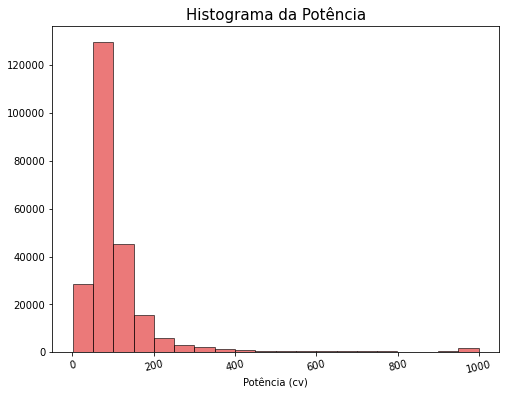

In [108]:
#Histograma da potência
cv = dfpot2['potencia']

fig = plt.figure(figsize=(8,6)) #Tamanho
plt.hist(cv, bins = 20, ec = "k", alpha = .6, color = '#df2020')
plt.xlabel("Potência (cv)",fontsize=10)
plt.title('Histograma da Potência',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('hist_pot.svg', format='svg')


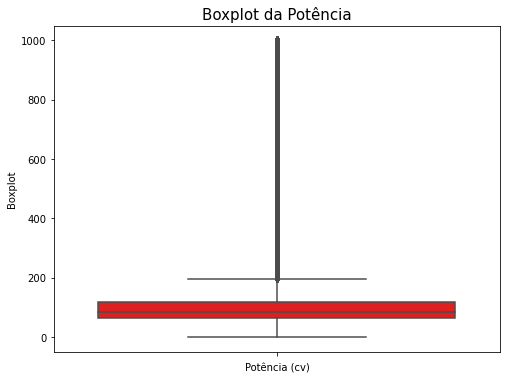

In [109]:
#Boxplot da potência
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(8,6)) #Tamanho
sns.boxplot(y=cv, palette=cores)
plt.xlabel("Potência (cv)",fontsize=10)
plt.ylabel('Boxplot',fontsize=10)
plt.title('Boxplot da Potência',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('boxplot_pot.svg', format='svg')


In [110]:
#Selecionando potências entre 60 a 300 cv
dfpot2 = dfpot2.loc[(dfpot2['potencia'] >=60) & (dfpot2['potencia'] <=300)]

dfpot2['potencia'].describe()

count    182468.000000
mean        106.596291
std          44.627240
min          60.000000
25%          76.000000
50%          92.000000
75%         120.000000
max         300.000000
Name: potencia, dtype: float64

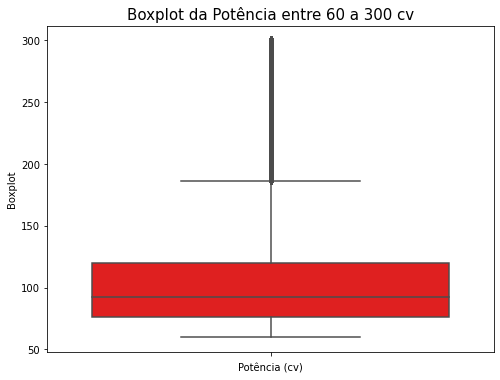

In [111]:
#Boxplot da potência
cv = dfpot2['potencia']

cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(8,6)) #Tamanho
sns.boxplot(y=cv, palette=cores)
plt.xlabel("Potência (cv)",fontsize=10)
plt.ylabel('Boxplot',fontsize=10)
plt.title('Boxplot da Potência entre 60 a 300 cv',fontsize=15)
plt.xticks(fontsize=10,rotation=13)
plt.savefig('boxplot_pot2.svg', format='svg')

In [112]:
#Backup dataset com seleção de potência

dfpot3 = dfpot2

dfpot3.head()

,marca,ano_fabricacao_veiculo,potencia
0,I/FORD F SERIES F68,2009,75
1,A.GUGELMIN/F.PROPRIA BUG,2008,85
2,A.SALVADOR/F.PROPRIA AUT,2014,86
4,ADAMO,1972,65
6,ADAMO,1975,69


### Preparando dados para concatenação com dataset de acidentes

In [113]:
#Explorando os dados de ano
dfpot3["ano_fabricacao_veiculo"].head()

0    2009
1    2008
2    2014
4    1972
6    1975
Name: ano_fabricacao_veiculo, dtype: int64

In [114]:
#Convertendo em string
dfpot3['ano_fabricacao_veiculo'] = dfpot3['ano_fabricacao_veiculo'].astype(str)
dfpot3["ano_fabricacao_veiculo"].head()

0    2009
1    2008
2    2014
4    1972
6    1975
Name: ano_fabricacao_veiculo, dtype: object

In [115]:
#Criando nova coluna com as colunas marca e ano de fabricação
dfpot3["marca_ano"] = dfpot3["marca"] + " " + dfpot3["ano_fabricacao_veiculo"]

dfpot3.head()

,marca,ano_fabricacao_veiculo,potencia,marca_ano
0,I/FORD F SERIES F68,2009,75,I/FORD F SERIES F68 2009
1,A.GUGELMIN/F.PROPRIA BUG,2008,85,A.GUGELMIN/F.PROPRIA BUG 2008
2,A.SALVADOR/F.PROPRIA AUT,2014,86,A.SALVADOR/F.PROPRIA AUT 2014
4,ADAMO,1972,65,ADAMO 1972
6,ADAMO,1975,69,ADAMO 1975


In [116]:
#Novo dataset com as colunas que serão concatenadas
dfpot4 = dfpot3.iloc[:,[3,2]]

dfpot4.head()

,marca_ano,potencia
0,I/FORD F SERIES F68 2009,75
1,A.GUGELMIN/F.PROPRIA BUG 2008,85
2,A.SALVADOR/F.PROPRIA AUT 2014,86
4,ADAMO 1972,65
6,ADAMO 1975,69


In [117]:
#Explorando dataset
dfpot4['marca_ano'].value_counts()

IMP/BMW 1993                     109
GM/OPALA DIPLOMATA SE 1989       102
IMP/BMW 1992                     101
GM/OPALA 1979                    100
FORD/GALAXIE LANDAU 1980          99
                                ... 
VW/ARKS 1985                       1
VW/VIRTUS AF 2018                  1
M.BENZ/LK 1317 1986                1
VW/BRM BUGGY 1959                  1
I/NISSAN TIIDA SEDAN 18F 2012      1
Name: marca_ano, Length: 32871, dtype: int64

In [118]:
#Explorando dataset
dfpot4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182468 entries, 0 to 482311
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   marca_ano  182468 non-null  object
 1   potencia   182468 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [119]:
#Removendo duplicados
dfpot4 = dfpot4.drop_duplicates()

dfpot4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182468 entries, 0 to 482311
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   marca_ano  182468 non-null  object
 1   potencia   182468 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [120]:
#Novo dataset agrupado pela média de potência
dfpot5 = dfpot4.groupby(['marca_ano']).mean()
dfpot5.head()

,potencia
marca_ano,
A.GUGELMIN/F.PROPRIA BUG 2008,85.0
A.SALVADOR/F.PROPRIA AUT 2014,86.0
ADAMO 1972,65.0
ADAMO 1975,69.0
ADAMO 1976,65.0


In [121]:
#Resetando indice
dfpot5= dfpot5.reset_index()
dfpot5.head()

,marca_ano,potencia
0,A.GUGELMIN/F.PROPRIA BUG 2008,85.0
1,A.SALVADOR/F.PROPRIA AUT 2014,86.0
2,ADAMO 1972,65.0
3,ADAMO 1975,69.0
4,ADAMO 1976,65.0


## Concatenação dos datasets de acidentes e características dos veículos 

In [122]:
#Backups
df_aci = df6
df_pot = dfpot5

In [123]:
#Explorando dataset acidentes
df_aci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171490 entries, 0 to 171489
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      171490 non-null  int32         
 1   pesid                   171490 non-null  float64       
 2   data_inversa            171490 non-null  datetime64[ns]
 3   dia_semana              171490 non-null  object        
 4   horario                 171490 non-null  object        
 5   uf                      171490 non-null  object        
 6   br                      171490 non-null  int32         
 7   km                      171490 non-null  object        
 8   municipio               171490 non-null  object        
 9   causa_principal         171490 non-null  object        
 10  causa_acidente          171490 non-null  object        
 11  ordem_tipo_acidente     171490 non-null  float64       
 12  tipo_acidente           171490

In [124]:
#Explorando dataset potência
df_pot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32871 entries, 0 to 32870
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marca_ano  32871 non-null  object 
 1   potencia   32871 non-null  float64
dtypes: float64(1), object(1)
memory usage: 513.7+ KB


In [125]:
#Concatenando datasets pela marca e ano
df = pd.merge(df_aci, df_pot, on=['marca_ano'], how='left')
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,latitude,longitude,regional,delegacia,uop,data_ano,idade_veiculo,Feriado,marca_ano,potencia
0,0,955.0,2017-01-01,domingo,00:01:00,SC,101,234,PALHOCA,Sim,...,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC,2017,14,Feriado,FIAT/PALIO WEEKEND EX 2003,83.071429
1,1,2.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,"-23,36951985","309,9351311",SR-PR,DEL7/7,UOP07/PR,2017,4,Feriado,VW/NOVO GOL 1.0 2013,79.400000
2,2,1558.0,2017-01-01,domingo,00:40:00,GO,60,188,GUAPO,Sim,...,"-16,82489647","-49,53520775",SR-GO,DEL1/1,UOP02/GO,2017,15,Feriado,RENAULT/CLIO RN 1.0 16V 2002,79.300000
3,3,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado,GM/CHEVETTE 1983,100.818182
4,4,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,"-28,5071196","-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado,GM/CHEVETTE 1983,100.818182


In [126]:
#Explorando dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171490 entries, 0 to 171489
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      171490 non-null  int32         
 1   pesid                   171490 non-null  float64       
 2   data_inversa            171490 non-null  datetime64[ns]
 3   dia_semana              171490 non-null  object        
 4   horario                 171490 non-null  object        
 5   uf                      171490 non-null  object        
 6   br                      171490 non-null  int32         
 7   km                      171490 non-null  object        
 8   municipio               171490 non-null  object        
 9   causa_principal         171490 non-null  object        
 10  causa_acidente          171490 non-null  object        
 11  ordem_tipo_acidente     171490 non-null  float64       
 12  tipo_acidente           171490

In [127]:
#Removendo valores ausentes
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170272 entries, 0 to 171489
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      170272 non-null  int32         
 1   pesid                   170272 non-null  float64       
 2   data_inversa            170272 non-null  datetime64[ns]
 3   dia_semana              170272 non-null  object        
 4   horario                 170272 non-null  object        
 5   uf                      170272 non-null  object        
 6   br                      170272 non-null  int32         
 7   km                      170272 non-null  object        
 8   municipio               170272 non-null  object        
 9   causa_principal         170272 non-null  object        
 10  causa_acidente          170272 non-null  object        
 11  ordem_tipo_acidente     170272 non-null  float64       
 12  tipo_acidente           170272

## Tratamento do dataset final 

### Definindo os classificadores

In [128]:
#Quantidade de valores ilesos
df.ilesos.value_counts()

1    112456
0     57816
Name: ilesos, dtype: int64

In [129]:
#Quantidade de valores de feridos leves
df.feridos_leves.value_counts()

0    126529
1     43743
Name: feridos_leves, dtype: int64

In [130]:
#Quantidade de valores de feridos graves
df.feridos_graves.value_counts()

0    160097
1     10175
Name: feridos_graves, dtype: int64

In [131]:
#Quantidade de valores de mortos
df.mortos.value_counts()

0    166374
1      3898
Name: mortos, dtype: int64

In [132]:
#Definindo a Gravidade pela soma dos feridos graves e mortos

df['Gravidade'] = df['feridos_graves']+df['mortos']

df['Gravidade'] = df['Gravidade'].replace({1: 'Grave'})

df['Gravidade'] = df['Gravidade'].replace({0: 'Não Grave'})

df['Gravidade'].value_counts()

Não Grave    156199
Grave         14073
Name: Gravidade, dtype: int64

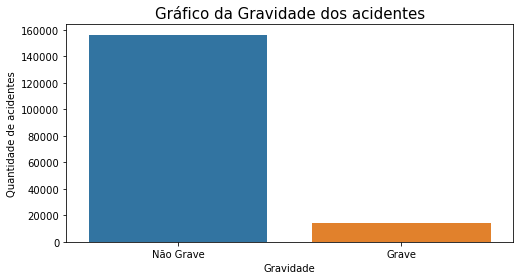

In [133]:
#Gráfico
fig = plt.figure(figsize=(8,4)) #Tamanho
sns.countplot(x='Gravidade', #variável
              order=df['Gravidade'].value_counts().index, data=df)
plt.xlabel('Gravidade',fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('Gráfico da Gravidade dos acidentes',fontsize=15)
plt.savefig('gravidade2.svg', format='svg')

In [134]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,longitude,regional,delegacia,uop,data_ano,idade_veiculo,Feriado,marca_ano,potencia,Gravidade
0,0,955.0,2017-01-01,domingo,00:01:00,SC,101,234,PALHOCA,Sim,...,"-48,6357",SR-SC,DEL8/1,UOP02/SC,2017,14,Feriado,FIAT/PALIO WEEKEND EX 2003,83.071429,Não Grave
1,1,2.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Sim,...,"309,9351311",SR-PR,DEL7/7,UOP07/PR,2017,4,Feriado,VW/NOVO GOL 1.0 2013,79.400000,Não Grave
2,2,1558.0,2017-01-01,domingo,00:40:00,GO,60,188,GUAPO,Sim,...,"-49,53520775",SR-GO,DEL1/1,UOP02/GO,2017,15,Feriado,RENAULT/CLIO RN 1.0 16V 2002,79.300000,Não Grave
3,3,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,"-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado,GM/CHEVETTE 1983,100.818182,Não Grave
4,4,10.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Sim,...,"-50,941176",SR-RS,DEL9/5,UOP03/RS,2017,34,Feriado,GM/CHEVETTE 1983,100.818182,Não Grave


### Seleção de variáveis

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170272 entries, 0 to 171489
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      170272 non-null  int32         
 1   pesid                   170272 non-null  float64       
 2   data_inversa            170272 non-null  datetime64[ns]
 3   dia_semana              170272 non-null  object        
 4   horario                 170272 non-null  object        
 5   uf                      170272 non-null  object        
 6   br                      170272 non-null  int32         
 7   km                      170272 non-null  object        
 8   municipio               170272 non-null  object        
 9   causa_principal         170272 non-null  object        
 10  causa_acidente          170272 non-null  object        
 11  ordem_tipo_acidente     170272 non-null  float64       
 12  tipo_acidente           170272

In [136]:
#Remoção de colunas desnecessárias
df2 = df.iloc[:,[ 3, 4, 5, 6, 7, 8, 10, 12, 15, 16, 17, 18, 19, 22, 26, 27, 38, 39, 41, 42]]
df2.head()

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,marca,idade,sexo,idade_veiculo,Feriado,potencia,Gravidade
0,domingo,00:01:00,SC,101,234,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Crescente,Chuva,Dupla,Curva,Não,FIAT/PALIO WEEKEND EX,35.0,Masculino,14,Feriado,83.071429,Não Grave
1,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,VW/NOVO GOL 1.0,27.0,Feminino,4,Feriado,79.400000,Não Grave
2,domingo,00:40:00,GO,60,188,GUAPO,Falta de Atenção à Condução,Colisão traseira,Decrescente,Nublado,Dupla,Reta,Sim,RENAULT/CLIO RN 1.0 16V,35.0,Masculino,15,Feriado,79.300000,Não Grave
3,domingo,01:45:00,RS,116,"34,9",VACARIA,Defeito Mecânico no Veículo,Capotamento,Decrescente,Céu Claro,Simples,Reta,Não,GM/CHEVETTE,31.0,Masculino,34,Feriado,100.818182,Não Grave
4,domingo,01:45:00,RS,116,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Decrescente,Céu Claro,Simples,Reta,Não,GM/CHEVETTE,31.0,Masculino,34,Feriado,100.818182,Não Grave


In [137]:
#Convertendo em variáveis categóricas
df2 = df2.astype("category")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170272 entries, 0 to 171489
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   dia_semana              170272 non-null  category
 1   horario                 170272 non-null  category
 2   uf                      170272 non-null  category
 3   br                      170272 non-null  category
 4   km                      170272 non-null  category
 5   municipio               170272 non-null  category
 6   causa_acidente          170272 non-null  category
 7   tipo_acidente           170272 non-null  category
 8   sentido_via             170272 non-null  category
 9   condicao_metereologica  170272 non-null  category
 10  tipo_pista              170272 non-null  category
 11  tracado_via             170272 non-null  category
 12  uso_solo                170272 non-null  category
 13  marca                   170272 non-null  category
 14  idad

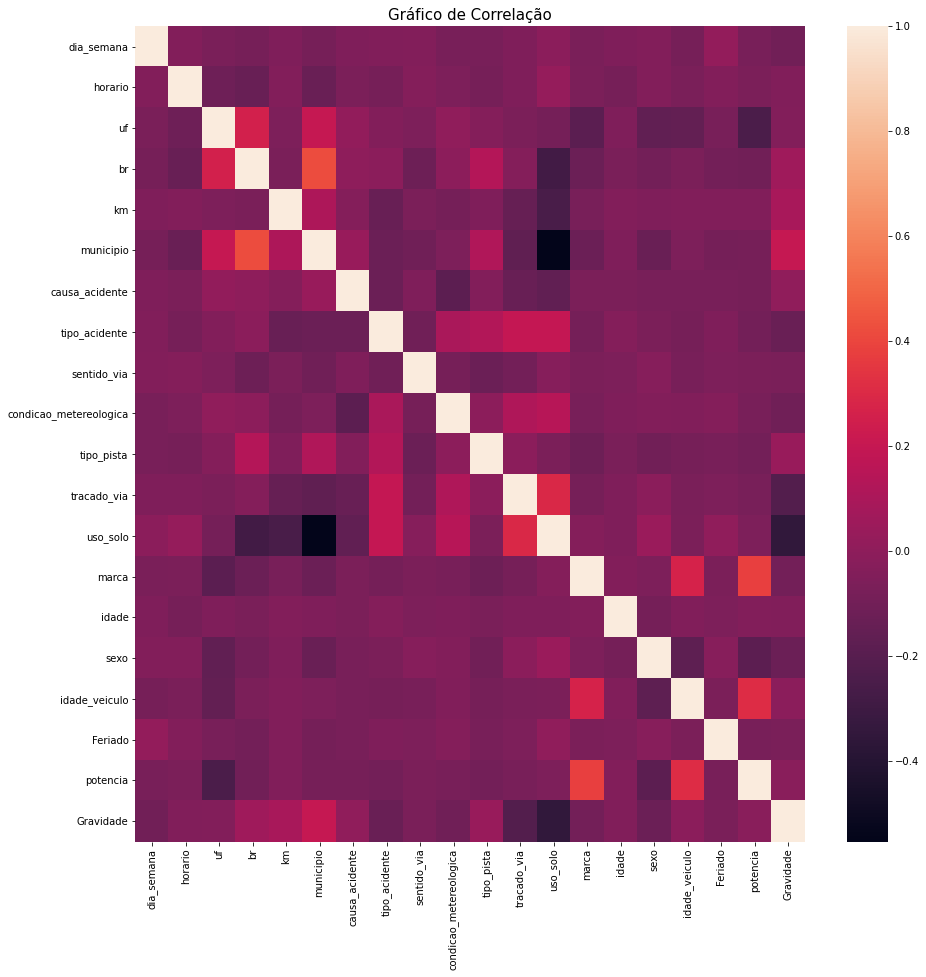

In [138]:
#Fatorizando as varíaveis 
df3 = df2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

#Criando Gráfico de Correlação etre variáveis
cores = sns.light_palette("red",30,reverse=True) #Cor
fig = plt.figure(figsize=(15,15)) #Tamanho
df3cor = sns.heatmap(df3.corr()) 
plt.title('Gráfico de Correlação',fontsize=15)
plt.savefig('correlação.svg', format='svg')

In [139]:
#Novo dataset com varíveis fatorizadas
dfML = df2.apply(lambda x : pd.factorize(x)[0])

In [140]:
#Separando o dataset em input e output
X = dfML.drop(['Gravidade'], axis=1)
y = dfML['Gravidade']

In [141]:
# Extração de Variáveis com Testes Estatísticos Univariados (Teste qui-quadrado)
test = SelectKBest(chi2, k=12)
fit = test.fit(X, y)
features = fit.transform(X)
print(features)

[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    0    2    2]
 ...
 [  77    5 2737 ...    0   25  689]
 [ 104   90 6743 ...    1   12    8]
 [ 104   90 6743 ...    0   25 1760]]


In [142]:
#Sumarizando as varíveis
fit.get_support(indices=True)

cols = fit.get_support(indices=True)
dfML2 = dfML.iloc[:,cols]
dfML2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170272 entries, 0 to 171489
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   horario         170272 non-null  int64
 1   br              170272 non-null  int64
 2   km              170272 non-null  int64
 3   municipio       170272 non-null  int64
 4   causa_acidente  170272 non-null  int64
 5   tipo_pista      170272 non-null  int64
 6   tracado_via     170272 non-null  int64
 7   uso_solo        170272 non-null  int64
 8   marca           170272 non-null  int64
 9   sexo            170272 non-null  int64
 10  idade_veiculo   170272 non-null  int64
 11  potencia        170272 non-null  int64
dtypes: int64(12)
memory usage: 21.9 MB


## Machine Learning

In [143]:
#Separando as varíveis 
X = dfML2
y = dfML['Gravidade']

In [144]:
#Criando os conjuntos de dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [145]:
# Padronização dos dados
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [146]:
# Aplicando a padronização aos dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
# Criação do modelo
mlp = MLPClassifier(hidden_layer_sizes = (10,10,10))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10))

In [148]:
#Fazendo as previsões e construindo a Confusion Matrix
predictions = mlp.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test,predictions))

[[38951     2]
 [ 3612     3]]


In [149]:
#Acurácia
print(accuracy_score(y_test,predictions))

0.9151005450103364


In [150]:
# Imprimindo o relatório
print("Relatório de Classificação:\n", classification_report(y_test, predictions, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, predictions)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9151    0.9999    0.9557     38953
           1     0.6000    0.0008    0.0017      3615

    accuracy                         0.9151     42568
   macro avg     0.7576    0.5004    0.4787     42568
weighted avg     0.8884    0.9151    0.8746     42568

AUC: 0.5004



## Balanceando os dados 

In [151]:
dfMLb = dfML

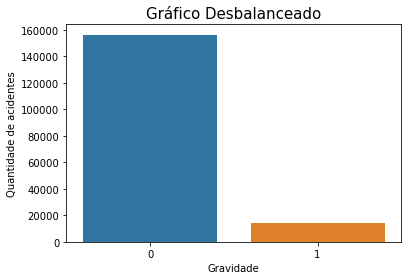

In [152]:
sns.countplot(x='Gravidade', #variável
              order=dfMLb['Gravidade'].value_counts().index, data=dfMLb)
plt.xlabel('Gravidade',fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('Gráfico Desbalanceado',fontsize=15)
plt.savefig('gravidadedes.svg', format='svg')

In [153]:
#Separando as varíaveis preditoras
X2 = dfMLb.drop("Gravidade", axis = 1)
y2 = dfMLb.Gravidade

In [154]:
#Aplicando balanceamento
nr = NearMiss()
X2, y2 = nr.fit_sample(X2, y2)

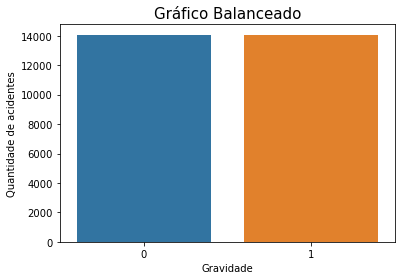

In [155]:
sns.countplot(x=y2, data=dfMLb)
plt.xlabel('Gravidade',fontsize=10)
plt.ylabel('Quantidade de acidentes',fontsize=10)
plt.title('Gráfico Balanceado',fontsize=15)
plt.savefig('gravidadebal.svg', format='svg')

In [156]:
#Conferindo valores
y2.value_counts()

1    14073
0    14073
Name: Gravidade, dtype: int64

## Aplicando Redes Neurais no dataset balanceado

In [157]:
#Criando os conjuntos de dados de treino e de teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [158]:
# Criação do modelo
mlp = MLPClassifier(hidden_layer_sizes = (10,10,10))
mlp.fit(X2_train, y2_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10))

In [159]:
#Fazendo as previsões e construindo a Confusion Matrix
predictions = mlp.predict(X2_test)

#Confusion Matrix
print(confusion_matrix(y2_test,predictions))

[[3230  237]
 [1175 2395]]


In [160]:
#Acurácia
print(accuracy_score(y2_test,predictions))

0.7993463123490123


In [161]:
# Imprimindo o relatório
print("Relatório de Classificação:\n", classification_report(y2_test, predictions, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y2_test, predictions)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7333    0.9316    0.8206      3467
           1     0.9100    0.6709    0.7723      3570

    accuracy                         0.7993      7037
   macro avg     0.8216    0.8013    0.7965      7037
weighted avg     0.8229    0.7993    0.7961      7037

AUC: 0.8013



## Otimizando Modelo

### Dados desbalanceados

In [162]:
# Construindo o modelo do classificador
mlp2 = MLPClassifier(max_iter=100)

In [163]:
#Valores do parâmetros a serem testados
param_grid = {'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}

In [164]:
#Aplicando o GridShearch balanceados
grid_search = GridSearchCV(mlp2, param_grid = param_grid)
grid_search.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [166]:
#Imprimindo o melhor parâmetro dados balanceados
print ('Melhores parâmetros encontrados: \ n', grid_search.best_params_)

Melhores parâmetros encontrados: \ n {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


In [165]:
#Fazendo as previsões e construindo a Confusion Matrix dados balanceados
predictions_grid = grid_search.predict(X_test)

#Confusion Matrix dados balanceados
print(confusion_matrix(y_test,predictions_grid))

[[29672  9281]
 [ 2970   645]]


In [167]:
#Acurácia
print(accuracy_score(y_test,predictions_grid))

0.7122016538244691


In [168]:
# Imprimindo o relatório dados balanceados
print("Relatório de Classificação:\n", classification_report(y_test, predictions_grid, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, predictions_grid)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9090    0.7617    0.8289     38953
           1     0.0650    0.1784    0.0953      3615

    accuracy                         0.7122     42568
   macro avg     0.4870    0.4701    0.4621     42568
weighted avg     0.8373    0.7122    0.7666     42568

AUC: 0.4701



### Dados balanceados

In [169]:
#Aplicando o GridShearch dados balanceados
grid_search2 = GridSearchCV(mlp2, param_grid = param_grid)
grid_search2.fit(X2, y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [171]:
#Imprimindo o melhor parâmetro dados desbalanceados
print ('Melhores parâmetros encontrados: \ n', grid_search2.best_params_)

Melhores parâmetros encontrados: \ n {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [170]:
#Fazendo as previsões e construindo a Confusion Matrix dados balanceados
predictions_grid2 = grid_search2.predict(X2_test)

#Confusion Matrix dados balanceados
print(confusion_matrix(y2_test,predictions_grid2))

[[2648  819]
 [ 454 3116]]


In [172]:
#Acurácia
print(accuracy_score(y2_test,predictions_grid2))

0.8190990478897258


In [173]:
# Imprimindo o relatório dados balanceados
print("Relatório de Classificação:\n", classification_report(y2_test, predictions_grid2, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y2_test, predictions_grid2)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8536    0.7638    0.8062      3467
           1     0.7919    0.8728    0.8304      3570

    accuracy                         0.8191      7037
   macro avg     0.8228    0.8183    0.8183      7037
weighted avg     0.8223    0.8191    0.8185      7037

AUC: 0.8183

